# Tutorial about rendering LocData

## Setting things up

In [1]:
from pathlib import Path

%matplotlib inline
# %matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import surepy as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Surepy:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


### Simulated data

Localizations are simulated that are distributed according to a Neyman-Scott distribution (blobs).

In [3]:
dat = sp.simulate_Thomas(n_samples=1000, n_features=2, centers=10, feature_range=(0, 1000), cluster_std=10, seed=0)
dat.print_summary()

identifier: "1"
comment: ""
creation_date: "2021-03-04 13:48:04 +0100"
modification_date: ""
source: SIMULATION
state: RAW
element_count: 1000
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""



## Show scatter plot

Since localization data is kept as a pandas dataframe standard plotting routines from pandas or matplotlip can be used.

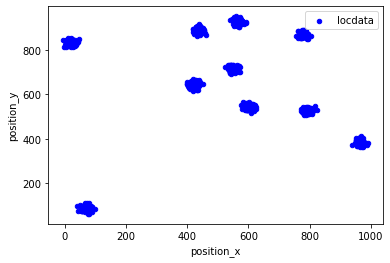

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

## Render by simple 2D binning

A method for simply binning localization data in 2D pixels is provided. This function uses the fast_histogram library.

In [5]:
img, bins, label = sp.histogram(dat, bin_size=10)

C:\Miniconda3\envs\smlm_analysis\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(array([53.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
         0.,  0., 18.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,
        11.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,
         0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

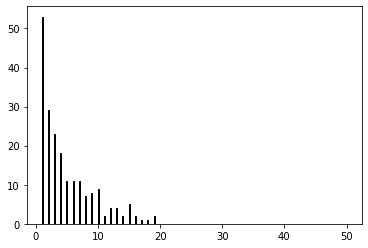

In [6]:
plt.hist(img.ravel(), bins=256, range=(1, 50), fc='k', ec='k');

The `render_2d` method can directly provide a new figure as output.

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

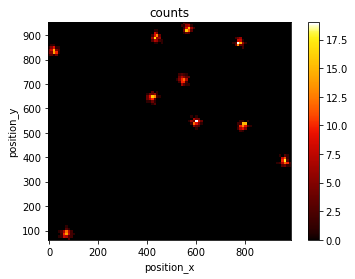

In [7]:
sp.render_2d(dat, bin_size=10);

Or it can be used within the matplotlib environment.

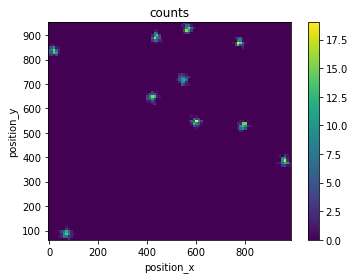

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sp.render_2d(dat, ax = ax, bin_size=10, cmap='viridis')
plt.show()

Intensity is per default scaled to the min and max intensity values but can be rescaled to a certain percentile between the min and max intensities:

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

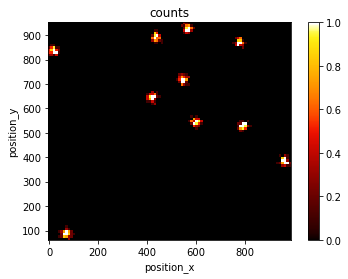

In [9]:
sp.render_2d(dat, bin_size=10, rescale=(0, 50));

The image size is set automatically to the min and max coordinates but can be set to (0, max) or an arbitrary range.

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

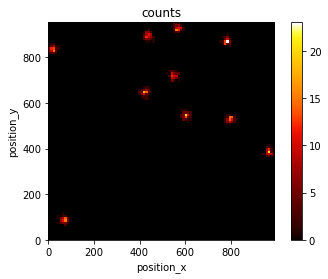

In [10]:
sp.render_2d(dat, bin_size=10, bin_range='zero');

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

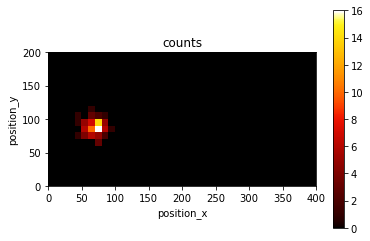

In [11]:
sp.render_2d(dat, bin_size=10, bin_range=((0,400),(0,200)));

## Use different libraries for rendering

Rendering can also be carried out with a different render engine. Choose one of the following (MPL is the standard matplotlib):

In [12]:
list(sp.RenderEngine)

[<RenderEngine.MPL: 0>,
 <RenderEngine.MPL_SCATTER_DENSITY: 1>,
 <RenderEngine.NAPARI: 2>]

### napari

As external viewer you can use **napari**.

For napari the qt gui interface has to be activated. Make sure to run the following command manually in a single cell and give enough time for this procedure to complete in the background.

or alternatively:

Remember: In any python script the command has to run within the `napari.gui_qt` context:

`
with napari.gui_qt():
    viewer = sp.render_2d(dat, render_engine=sp.RenderEngine.NAPARI)
`

### mpl-scatter-density

For interactive viewing with variable binning, **mpl-scatter-density** is helpful. To run this the notebook has to be run with a new kernel applying the magic command `%matplotlib widget`  before matplotib is imported.

C:\Miniconda3\envs\smlm_analysis\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Miniconda3\envs\smlm_analysis\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


<ScatterDensityAxesSubplot:label='scatter_density', title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

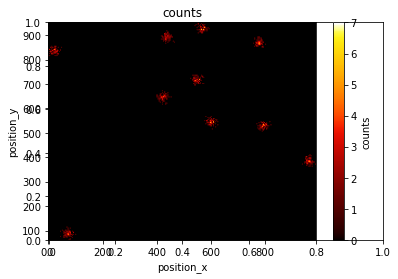

In [13]:
sp.render_2d(dat, render_engine=sp.RenderEngine.MPL_SCATTER_DENSITY);